# Enron Dataset Exploration
### by Mohamad Zeini Jahromi
## Introduction
Enron Corporation was an American energy, commodities, and services company based in Houston, Texas. Before its bankruptcy on December 2, 2001, Enron employed approximately 20,000 staff and was one of the world's major electricity, natural gas, communications and pulp and paper companies, with claimed revenues of nearly $101 billion during 2000. Fortune named Enron "America's Most Innovative Company" for six consecutive years.

At the end of 2001, it was revealed that its reported financial condition was sustained by institutionalized, systematic, and creatively planned accounting fraud, known since as the Enron scandal. In the resulting Federal investigation, there was a significant amount of typically confidential information entered into public record, including tens of thousands of emails and detailed financial data for top executives. 

The objective of this project is to come up with a predictive model for identifying employees who have committed fraud ("Person of Interest" or POI). I will explore the Enron email and financial dataset and test different classifiers to find the most accurate one in terms of identifying POI label. 

## Dataset 
The dataset contained 146 records with 21 financial and email features. POI label is a Boolean label (True or False) and shows whether a person committed fraud or not. 18 out of 146 records were labeled as a "Person Of Interest" (POI). The following shows entries for the first person, 'METTS MARK'.

In [2]:
import sys
import os
import pickle
path = "C:\Users\Mo\Dropbox\DAND\P5\ud120-projects-master\Final_project"
os.chdir(path)
with open("final_project_dataset.pkl", "r") as data_file:
    data_dict = pickle.load(data_file)

print 'Number of entries  : ', len(data_dict)
print 'Number of features : ', len(data_dict.values()[0])
poi_tot = 0
for k, v in data_dict.items():
    if v['poi'] == True:
        poi_tot += 1
print 'Number of POI      : ', poi_tot
data_dict.items()[0]

Number of entries  :  146
Number of features :  21
Number of POI      :  18


('METTS MARK',
 {'bonus': 600000,
  'deferral_payments': 'NaN',
  'deferred_income': 'NaN',
  'director_fees': 'NaN',
  'email_address': 'mark.metts@enron.com',
  'exercised_stock_options': 'NaN',
  'expenses': 94299,
  'from_messages': 29,
  'from_poi_to_this_person': 38,
  'from_this_person_to_poi': 1,
  'loan_advances': 'NaN',
  'long_term_incentive': 'NaN',
  'other': 1740,
  'poi': False,
  'restricted_stock': 585062,
  'restricted_stock_deferred': 'NaN',
  'salary': 365788,
  'shared_receipt_with_poi': 702,
  'to_messages': 807,
  'total_payments': 1061827,
  'total_stock_value': 585062})

## Features
Many of features have missing values and assigned 'NaN' as the value entries. The following list shows which features have the most 'NaN' values. I will not include the features with more than 100 'NaN's in the final features list.

In [3]:
dic_nan = {}
for key, value in data_dict.items():
    for k, v in value.items():
        if k not in dic_nan.keys():
            dic_nan[k] = 0
        if v == 'NaN':
            dic_nan[k] += 1
for k, v in dic_nan.items(): 
    print("{: >25} {: >10}".format(*[k, v]))

                   salary         51
              to_messages         60
        deferral_payments        107
           total_payments         21
            loan_advances        142
                    bonus         64
            email_address         35
restricted_stock_deferred        128
        total_stock_value         20
  shared_receipt_with_poi         60
      long_term_incentive         80
  exercised_stock_options         44
            from_messages         60
                    other         53
  from_poi_to_this_person         60
  from_this_person_to_poi         60
                      poi          0
          deferred_income         97
                 expenses         51
         restricted_stock         36
            director_fees        129


## Remove outliers
The following table represents the statistical summary of our dataset. First we created a dataframe (first table) and grouped all the entries by 'poi' status and exclude all the 'NaN' values (second table). The significant differences between the average and maximum values, shows where we should look for possible outliers.

In [4]:
import pandas as pd
from numpy import mean
df = pd.DataFrame(data_dict)
df = df.convert_objects(convert_numeric=True)
df = df.transpose()
# df = df.fillna(0)
df.head()

C:\Users\Mo\Anaconda3\envs\DAND\lib\site-packages\ipykernel\__main__.py:4: FutureWarning: convert_objects is deprecated.  Use the data-type specific converters pd.to_datetime, pd.to_timedelta and pd.to_numeric.


,bonus,deferral_payments,deferred_income,director_fees,email_address,exercised_stock_options,expenses,from_messages,from_poi_to_this_person,from_this_person_to_poi,...,long_term_incentive,other,poi,restricted_stock,restricted_stock_deferred,salary,shared_receipt_with_poi,to_messages,total_payments,total_stock_value
ALLEN PHILLIP K,4175000.0,2869717.0,-3081055.0,NaN,NaN,1729541.0,13868.0,2195.0,47.0,65.0,...,304805.0,152.0,0.0,126027.0,-126027.0,201955.0,1407.0,2902.0,4484442.0,1729541.0
BADUM JAMES P,NaN,178980.0,NaN,NaN,NaN,257817.0,3486.0,NaN,NaN,NaN,...,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,182466.0,257817.0
BANNANTINE JAMES M,NaN,NaN,-5104.0,NaN,NaN,4046157.0,56301.0,29.0,39.0,0.0,...,NaN,864523.0,0.0,1757552.0,-560222.0,477.0,465.0,566.0,916197.0,5243487.0
BAXTER JOHN C,1200000.0,1295738.0,-1386055.0,NaN,NaN,6680544.0,11200.0,NaN,NaN,NaN,...,1586055.0,2660303.0,0.0,3942714.0,NaN,267102.0,NaN,NaN,5634343.0,10623258.0
BAY FRANKLIN R,400000.0,260455.0,-201641.0,NaN,NaN,NaN,129142.0,NaN,NaN,NaN,...,NaN,69.0,0.0,145796.0,-82782.0,239671.0,NaN,NaN,827696.0,63014.0


In [5]:
df.groupby(['poi']).describe().round()

C:\Users\Mo\Anaconda3\envs\DAND\lib\site-packages\pandas\core\series.py:1340: RuntimeWarning: invalid value encountered in rint
  result = _values_from_object(self).round(decimals)


bonus  deferral_payments  deferred_income  director_fees  \
poi                                                                        
0.0 count        66.0               34.0             38.0           17.0   
    mean    2446776.0          1807789.0       -1170917.0       166805.0   
    std    11917761.0          5510228.0        4531597.0       319891.0   
    min       70000.0          -102500.0      -27992891.0         3285.0   
    25%      400000.0            87469.0        -581244.0        98784.0   
    50%      725000.0           382532.0        -123142.0       108579.0   
    75%     1000000.0          1066354.0         -37086.0       113784.0   
    max    97343619.0         32083396.0          -1042.0      1398517.0   
1.0 count        16.0                5.0             11.0            0.0   
    mean    2075000.0           519894.0       -1035313.0            NaN   
    std     2047437.0           912889.0        1334972.0            NaN   
    min      200000.0            10259.0       -3504386.0            NaN   
    25%      775000.0            27610.0       -1860244.0            NaN   
    50%     1275000.0           202911.0        -262500.0            NaN   
    75%     2062500.0           214678.0        -122031.0            NaN   
    max     7000000.0          2144013.0           -833.0            NaN   

           email_address  exercised_stock_options   expenses  from_messages  \
poi                                                                           
0.0 count            0.0                     90.0       77.0           72.0   
    mean             NaN                5390155.0   120150.0          669.0   
    std              NaN               32755564.0   592508.0         1979.0   
    min              NaN                   3285.0      148.0           12.0   
    25%              NaN                 450758.0    18834.0           20.0   
    50%              NaN                1043324.0    46145.0           41.0   
    75%              NaN                2204999.0    78552.0          216.0   
    max              NaN              311764000.0  5235198.0        14368.0   
1.0 count            0.0                     12.0       18.0           14.0   
    mean             NaN               10463794.0    59874.0          300.0   
    std              NaN               12382588.0    37525.0          806.0   
    min              NaN                 384728.0    16514.0           16.0   
    25%              NaN                1456581.0    31323.0           33.0   
    50%              NaN                3914557.0    50448.0           44.0   
    75%              NaN               19386044.0    84125.0          102.0   
    max              NaN               34348384.0   127017.0         3069.0   

           from_poi_to_this_person  from_this_person_to_poi  loan_advances  \
poi                                                                          
0.0 count                     72.0                     72.0            3.0   
    mean                      58.0                     36.0     28775000.0   
    std                       88.0                     85.0     47768001.0   
    min                        0.0                      0.0       400000.0   
    25%                       10.0                      0.0      1200000.0   
    50%                       26.0                      6.0      2000000.0   
    75%                       62.0                     23.0     42962500.0   
    max                      528.0                    411.0     83925000.0   
1.0 count                     14.0                     14.0            1.0   
    mean                      98.0                     67.0     81525000.0   
    std                       76.0                    158.0            NaN   
    min                       13.0                      4.0     81525000.0   
    25%                       44.0                     12.0     81525000.0   
    50%                       62.0                    

Let's visualize the outliers by plotting "salary" vs. "bonus" features. Also we will print out persons with 'salary' above 1 million dollars and 'bonus' above 10 million dollars.

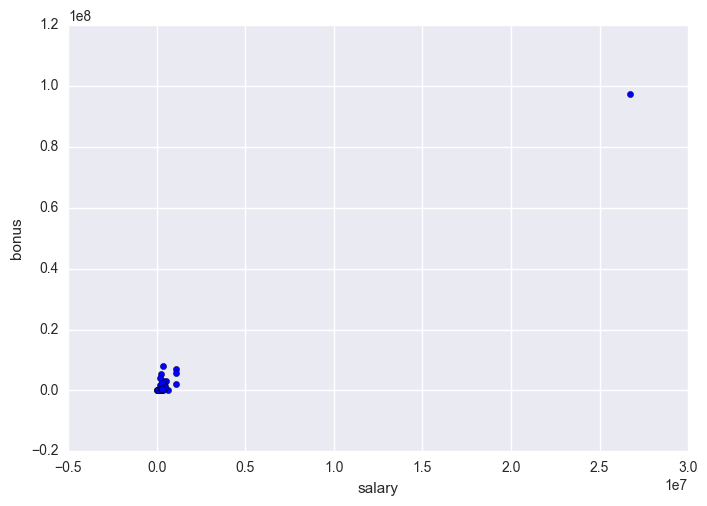

       LAY KENNETH L         1072321         7000000            True
  SKILLING JEFFREY K         1111258         5600000            True
               TOTAL        26704229        97343619           False
      FREVERT MARK A         1060932         2000000           False


In [6]:
sys.path.append("../tools/")
from feature_format import featureFormat, targetFeatureSplit
import matplotlib.pyplot as plt
import seaborn as sb

features = ["salary", "bonus"]
data = featureFormat(data_dict, features)

for point in data:
    salary = point[0]
    bonus = point[1]
    plt.scatter( salary, bonus )

plt.xlabel("salary")
plt.ylabel("bonus")
plt.show()

for k, v in data_dict.items():
     if (v['salary'] != 'NaN' and v['salary'] > 10**6) or (v['bonus'] != 'NaN' and v['bonus'] > 10**7): 
            print("{: >20} {: >15} {: >15} {: >15}".format(*[k, v['salary'], v['bonus'], str(v['poi'])]))

Obviously 'TOTAL' entry is an extreme outlier and is not a real person and we will remove it from the dataset. Jefferey Skilling, Kenneth Lay are notable guys related to the fraud case. Next, we replot the data points for further investigation.

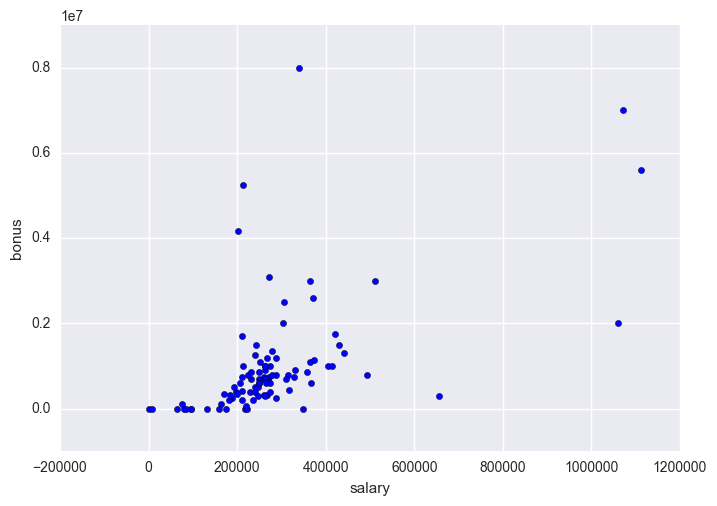

In [7]:
data_dict.pop('TOTAL', 0)
features = ["salary", "bonus"]
data = featureFormat(data_dict, features)

for point in data:
    salary = point[0]
    bonus = point[1]
    plt.scatter( salary, bonus )

plt.xlabel("salary")
plt.ylabel("bonus")
plt.show()

## Create new features

Before we create and engineer new features, let's look at our features list along with their scores. I used 'SelectKBest' to select top 10 most effective features.

In [50]:
my_features = ['poi', 'salary', 'total_payments', 'bonus',
               'total_stock_value', 'shared_receipt_with_poi', 
               'long_term_incentive', 'exercised_stock_options', 'other', 
               'deferred_income', 'expenses', 'restricted_stock',
               'from_poi_to_this_person', 'from_this_person_to_poi', 
               'from_messages', 'to_messages']

my_dataset = data_dict
data = featureFormat(my_dataset, my_features, sort_keys = True)
labels, features = targetFeatureSplit(data)

# K-best features
from sklearn.feature_selection import SelectKBest
k_features = SelectKBest(k=10)
k_features.fit(features, labels)

k_list = zip(k_features.get_support(), my_features[1:], k_features.scores_)
k_list = sorted(k_list, key=lambda x: x[2], reverse=True)
for i in k_list: 
    print("{: >25} {: >25}".format(*[i[1], i[2]]))

  exercised_stock_options             25.0975415287
        total_stock_value             24.4676540475
                    bonus             21.0600017075
                   salary              18.575703268
          deferred_income             11.5955476597
      long_term_incentive             10.0724545294
         restricted_stock             9.34670079105
           total_payments             8.86672153711
  shared_receipt_with_poi             8.74648553213
                 expenses             6.23420114051
  from_poi_to_this_person             5.34494152315
                    other              4.2049708583
  from_this_person_to_poi             2.42650812724
              to_messages             1.69882434858
            from_messages            0.164164498234


Scaling the 'from_this_person_to_poi' and 'from_poi_to_this_person' by the total number of emails sent and received, respectively, might help us identify those have low amounts of email activity overall, but a high percentage of email activity with POI's. 

In addition to our initial feature list, I created two new features based on number of emails 'sent to' or 'received from' POI features as follows:
* fraction_from_poi
* fraction_to_poi

The following list shows our new features list along with their respective score. Although our two new features have higher scores than previous ones but they are still in lower part of our features list and might not be included in the final feature set. Also, I want to point out that 'shared_receipt_with_poi' feature have higher score than our new features and represents stronger relationship.

In [51]:
for k, v in my_dataset.items():
    from_poi_to_this_person = v["from_poi_to_this_person"]
    to_messages = v["to_messages"]
    
    fraction = 0. 
    if from_poi_to_this_person != 'NaN' and to_messages != 'NaN':
        fraction_from_poi = float(from_poi_to_this_person) / to_messages
    my_dataset[k]["fraction_from_poi"] = fraction_from_poi


    from_this_person_to_poi = v["from_this_person_to_poi"]
    from_messages = v["from_messages"]
    if from_this_person_to_poi != 'NaN' and from_messages != 'NaN':
        fraction_to_poi = float(from_this_person_to_poi) / from_messages
    my_dataset[k]["fraction_to_poi"] = fraction_to_poi

my_features = ['poi', 'salary', 'total_payments', 'bonus',
               'total_stock_value', 'shared_receipt_with_poi', 
               'long_term_incentive', 'exercised_stock_options', 'other', 
               'deferred_income', 'expenses', 'restricted_stock', 
               'fraction_from_poi', 'fraction_to_poi']

# K-best features
from sklearn.feature_selection import SelectKBest
k_features = SelectKBest(k=10)
k_features.fit(features, labels)

k_list = zip(k_features.get_support(), my_features[1:], k_features.scores_)
k_list = sorted(k_list, key=lambda x: x[2], reverse=True)
for i in k_list: 
    print("{: >25} {: >25}".format(*[i[1], i[2]]))

  exercised_stock_options             25.0975415287
        total_stock_value             24.4676540475
                    bonus             21.0600017075
                   salary              18.575703268
          deferred_income             11.5955476597
      long_term_incentive             10.0724545294
         restricted_stock             9.34670079105
           total_payments             8.86672153711
  shared_receipt_with_poi             8.74648553213
                 expenses             6.23420114051
        fraction_from_poi             5.34494152315
                    other              4.2049708583
          fraction_to_poi             2.42650812724


## Feature selection process

I used two feature selection process, select K-Best and PCA, to select the best features. Select k-best removes all but the k highest scoring features and PCA is a process of transforming the data and projecting it to a lower dimensional space. We iterate between different number of K-Best and PCA to find the optimum number of features. The following are functions to perform the iteration process.

In [39]:
from sklearn.feature_selection import SelectKBest
def find_kbest(grid_search, features, labels, parameters): 
    for i in range(2, 6):
        print "================ K best features, k = {0} ================".format(i)
        kb = SelectKBest(k = i)
        k_features = kb.fit_transform(features, labels)       
        k_list = zip(kb.get_support(), my_features[1:], kb.scores_)
        k_list = sorted(k_list, key=lambda x: x[2], reverse=True)
        for item in k_list: 
            if item[0] == True: print item[1:]        
        cross_val(grid_search, k_features, labels, parameters)

In [40]:
from sklearn.decomposition import PCA
from sklearn.cross_validation import train_test_split
def doPCA(grid_search, features, labels, parameters):    
    for i in range(2, 6):
        features_train, features_test, labels_train, labels_test = train_test_split(features, labels, test_size=0.3, random_state=42)
        print "========= Principal Components features, n = {0} =========".format(i)    
        pca = PCA(n_components = i)
        pca.fit(features_train)
        pca_features = pca.transform(features)
        cross_val(grid_search, pca_features, labels, parameters) 

##  Selection of algorithms 

I will use four algorithms along with the parameter tuning process to find the most accurate and predictive model. The algorithms used are as follows:

* Random Forest Classifier
* Decision Tree Classifier
* AdaBoost Classifier
* Gaussian Naive Bayse Classifier

##  Parameters tuning  

In addition to the feature selection process by K-Best and PCA, the grid search function has been used to assign different number of parameters and choose the best classifier to maximize the precision and recall and the overall accuracy.

Grid search function construct a grid of all the combinations of parameters, tries each combination, and then reports back the best combination for specific algorithm.

Parameters tuning refers to the adjustment of the algorithm when training, in order to improve the fit on the test set. Parameter can influence the outcome of the learning process, the more tuned the parameters, the more biased the algorithm will be to the training data and test harness. The strategy can be effective but it can also lead to more fragile models and overfit the test harness but don't perform well in practice. For every algorithms, I tried to tune couple of effective paremeters.

## Cross validation

The purpose of cross validation is to test the model multiple times and make balance between model bias and variance. Overfitting, occurs when we have a high variance in our model and is one of the most challenging things to avoid from in machine learning. 

Cross validation enable us to first fit a model on a portion of our data set (train) and then try the model on the remainder of the dataset (test) and calculate the overall accuracy. 

I used Stratified Shuffle Split cross validation with the test size of 30% to evaluate prediction accuracy of different classifiers. This algorithm essentially creates multiple train and test datasets out of our dataset and calculate the overall performance.

We are using "recall" and "precision" parameters to evaluate our classifier's prediction performance. Recall is the ability of classifier to identify all the positive values while precision is its ability to not falsely assign positive values to those values that are actually negative. Using these two we can understand how accurate our model is in identifying the POI persons within the entire dataset.

The following shows Stratified Shuffle Split cross validation used in our study.

In [61]:
from sklearn.cross_validation import StratifiedShuffleSplit
from sklearn.metrics import precision_recall_fscore_support
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report

def cross_val(grid_search, features, labels, parameters):
    
    cv = StratifiedShuffleSplit(labels, 100, random_state = 42)
    acc, precision, recall, fscore, support = [], [], [], [], []

    for train_indices, test_indices in cv:
        #make training and testing sets
        features_train= [features[ii] for ii in train_indices]
        features_test= [features[ii] for ii in test_indices]
        labels_train=[labels[ii] for ii in train_indices]
        labels_test=[labels[ii] for ii in test_indices]

        grid_search.fit(features_train, labels_train)
        predictions = grid_search.predict(features_test)
        
        acc += [accuracy_score(predictions, labels_test)]
        report = precision_recall_fscore_support(labels_test, predictions)
        precision += [report[0][1]]
        recall += [report[1][1]]
        fscore += [report[2][1]]
        support += [report[3][1]]
    print '=================================='
    print 'Accuracy:', mean(acc)
    print 'Precision:', mean(precision)
    print 'Recall:', mean(recall)
    print 'Fscore:', mean(fscore)
    print 'Support:', mean(support)
    #print classification_report(labels_test, predictions)
    if len(parameters.keys()) != 0:
        print '========= Best Parameters ========='
        best_params = grid_search.best_estimator_.get_params()
        for param_name in sorted(parameters.keys()):
            print '%s=%r, ' % (param_name, best_params[param_name])

## Random Forest Classifier
For start, we try Random Forest Classifier along with the parameter tuning function (Grid Search). We iterate through two loops of features selection (K-Best and PCA) to find the best combination of features and algorithm's parameters.

In [28]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.grid_search import GridSearchCV

parameters = {'n_estimators':[2,5,10], 'min_samples_split': [2,3,5], 
              'min_impurity_split' : [1e-7,1e-15,1e-20],'warm_start' : [True, False]}
clf = RandomForestClassifier()
grid_search = GridSearchCV(clf, parameters)
find_kbest(grid_search, features, labels, parameters)

================ K best features, k = 2 ================
('exercised_stock_options', 25.380105299760199)
('total_stock_value', 24.752523020258508)
Accuracy: 0.842666666667
Precision: 0.215333333333
Recall: 0.155
Fscore: 0.173523809524
Support: 2.0
========= Best Parameters =========
min_impurity_split=1e-15, 
min_samples_split=3, 
n_estimators=2, 
warm_start=False, 
================ K best features, k = 3 ================
('exercised_stock_options', 25.380105299760199)
('total_stock_value', 24.752523020258508)
('bonus', 21.327890413979102)
Accuracy: 0.872
Precision: 0.384833333333
Recall: 0.28
Fscore: 0.308714285714
Support: 2.0
========= Best Parameters =========
min_impurity_split=1e-07, 
min_samples_split=5, 
n_estimators=10, 
warm_start=False, 
================ K best features, k = 4 ================
('exercised_stock_options', 25.380105299760199)
('total_stock_value', 24.752523020258508)
('bonus', 21.327890413979102)
('salary', 18.861795316466416)
Accuracy: 0.854
Precision: 0.2575

In [31]:
doPCA(grid_search, features, labels, parameters)

========= Principal Components features, n = 2 =========
Accuracy: 0.83
Precision: 0.115
Recall: 0.085
Fscore: 0.0936666666667
Support: 2.0
========= Best Parameters =========
min_impurity_split=1e-07, 
min_samples_split=5, 
n_estimators=10, 
warm_start=True, 
========= Principal Components features, n = 3 =========
Accuracy: 0.849333333333
Precision: 0.1625
Recall: 0.145
Fscore: 0.145333333333
Support: 2.0
========= Best Parameters =========
min_impurity_split=1e-15, 
min_samples_split=2, 
n_estimators=2, 
warm_start=False, 
========= Principal Components features, n = 4 =========
Accuracy: 0.833333333333
Precision: 0.12
Recall: 0.085
Fscore: 0.0953333333333
Support: 2.0
========= Best Parameters =========
min_impurity_split=1e-20, 
min_samples_split=5, 
n_estimators=10, 
warm_start=False, 
========= Principal Components features, n = 5 =========
Accuracy: 0.852
Precision: 0.154166666667
Recall: 0.12
Fscore: 0.126666666667
Support: 2.0
========= Best Parameters =========
min_impurity_

## AdaBoost Classifier
AdaBoost Classifier is the second classifier we are trying. Here again the parameter tuning function (Grid Search) and two loops of features selection (K-Best and PCA) has been used to find the best combination of features and algorithm's parameters.

In [32]:
from sklearn.ensemble import AdaBoostClassifier
parameters = {'n_estimators': [10, 20, 40],
               'algorithm': ['SAMME', 'SAMME.R'],
               'learning_rate': [.5, 1, 1.5]}

clf = AdaBoostClassifier()
grid_search = GridSearchCV(clf, parameters)
find_kbest(grid_search, features, labels, parameters)

================ K best features, k = 2 ================
('exercised_stock_options', 25.380105299760199)
('total_stock_value', 24.752523020258508)
Accuracy: 0.880666666667
Precision: 0.308333333333
Recall: 0.175
Fscore: 0.219
Support: 2.0
========= Best Parameters =========
algorithm='SAMME.R', 
learning_rate=0.5, 
n_estimators=20, 
================ K best features, k = 3 ================
('exercised_stock_options', 25.380105299760199)
('total_stock_value', 24.752523020258508)
('bonus', 21.327890413979102)
Accuracy: 0.858
Precision: 0.259166666667
Recall: 0.17
Fscore: 0.198
Support: 2.0
========= Best Parameters =========
algorithm='SAMME', 
learning_rate=0.5, 
n_estimators=40, 
================ K best features, k = 4 ================
('exercised_stock_options', 25.380105299760199)
('total_stock_value', 24.752523020258508)
('bonus', 21.327890413979102)
('salary', 18.861795316466416)
Accuracy: 0.854666666667
Precision: 0.242023809524
Recall: 0.16
Fscore: 0.182444444444
Support: 2.0
====

In [33]:
doPCA(grid_search, features, labels, parameters)

========= Principal Components features, n = 2 =========
Accuracy: 0.861333333333
Precision: 0.14
Recall: 0.07
Fscore: 0.0933333333333
Support: 2.0
========= Best Parameters =========
algorithm='SAMME', 
learning_rate=0.5, 
n_estimators=10, 
========= Principal Components features, n = 3 =========
Accuracy: 0.86
Precision: 0.13
Recall: 0.065
Fscore: 0.0866666666667
Support: 2.0
========= Best Parameters =========
algorithm='SAMME', 
learning_rate=0.5, 
n_estimators=20, 
========= Principal Components features, n = 4 =========
Accuracy: 0.845333333333
Precision: 0.109166666667
Recall: 0.075
Fscore: 0.0846666666667
Support: 2.0
========= Best Parameters =========
algorithm='SAMME', 
learning_rate=0.5, 
n_estimators=10, 
========= Principal Components features, n = 5 =========
Accuracy: 0.845333333333
Precision: 0.109166666667
Recall: 0.09
Fscore: 0.093
Support: 2.0
========= Best Parameters =========
algorithm='SAMME', 
learning_rate=0.5, 
n_estimators=40, 


## Decision Tree Classifier
Decision Tree Classifier is the third classifier we are testing on our dataset. The parameter tuning function (Grid Search) and two loops of features selection (K-Best and PCA) are being used to find the best combination of features and algorithm's parameters.

In [34]:
from sklearn import tree
parameters = {'criterion': ['gini', 'entropy'],
               'min_samples_split': [2, 10, 20],
               'max_depth': [None, 2, 5, 10],
               'min_samples_leaf': [1, 5, 10],
               'max_leaf_nodes': [None, 5, 10, 20]}
clf = tree.DecisionTreeClassifier()
grid_search = GridSearchCV(clf, parameters)
find_kbest(grid_search, features, labels, parameters)

================ K best features, k = 2 ================
('exercised_stock_options', 25.380105299760199)
('total_stock_value', 24.752523020258508)
Accuracy: 0.87
Precision: 0.18
Recall: 0.095
Fscore: 0.123333333333
Support: 2.0
========= Best Parameters =========
criterion='entropy', 
max_depth=2, 
max_leaf_nodes=None, 
min_samples_leaf=1, 
min_samples_split=2, 
================ K best features, k = 3 ================
('exercised_stock_options', 25.380105299760199)
('total_stock_value', 24.752523020258508)
('bonus', 21.327890413979102)
Accuracy: 0.836666666667
Precision: 0.162833333333
Recall: 0.12
Fscore: 0.128523809524
Support: 2.0
========= Best Parameters =========
criterion='gini', 
max_depth=2, 
max_leaf_nodes=None, 
min_samples_leaf=1, 
min_samples_split=20, 
================ K best features, k = 4 ================
('exercised_stock_options', 25.380105299760199)
('total_stock_value', 24.752523020258508)
('bonus', 21.327890413979102)
('salary', 18.861795316466416)
Accuracy: 0.832

In [35]:
doPCA(grid_search, features, labels, parameters)

========= Principal Components features, n = 2 =========
Accuracy: 0.846666666667
Precision: 0.02
Recall: 0.015
Fscore: 0.0166666666667
Support: 2.0
========= Best Parameters =========
criterion='gini', 
max_depth=None, 
max_leaf_nodes=5, 
min_samples_leaf=1, 
min_samples_split=2, 
========= Principal Components features, n = 3 =========
Accuracy: 0.853333333333
Precision: 0.0883333333333
Recall: 0.07
Fscore: 0.0743333333333
Support: 2.0
========= Best Parameters =========
criterion='gini', 
max_depth=5, 
max_leaf_nodes=20, 
min_samples_leaf=1, 
min_samples_split=2, 
========= Principal Components features, n = 4 =========
Accuracy: 0.841333333333
Precision: 0.0308333333333
Recall: 0.025
Fscore: 0.0256666666667
Support: 2.0
========= Best Parameters =========
criterion='entropy', 
max_depth=2, 
max_leaf_nodes=None, 
min_samples_leaf=1, 
min_samples_split=2, 
========= Principal Components features, n = 5 =========
Accuracy: 0.836
Precision: 0.0291666666667
Recall: 0.025
Fscore: 0.02466

## Naive Bayse
Finally, we are trying Gaussian Naive Bayse on our dataset. Since we don't have many options for parameter tuning, we used the default values. Two loops of features selection (K-Best and PCA) are being used to find the best combination of features.

In [62]:
from sklearn.naive_bayes import GaussianNB
parameters = {}
clf = GaussianNB()
find_kbest(clf, features, labels, parameters )

================ K best features, k = 2 ================
('exercised_stock_options', 25.380105299760199)
('total_stock_value', 24.752523020258508)
Accuracy: 0.856666666667
Precision: 0.326666666667
Recall: 0.245
Fscore: 0.267333333333
Support: 2.0
================ K best features, k = 3 ================
('exercised_stock_options', 25.380105299760199)
('total_stock_value', 24.752523020258508)
('bonus', 21.327890413979102)
Accuracy: 0.849333333333
Precision: 0.365
Recall: 0.305
Fscore: 0.313666666667
Support: 2.0
================ K best features, k = 4 ================
('exercised_stock_options', 25.380105299760199)
('total_stock_value', 24.752523020258508)
('bonus', 21.327890413979102)
('salary', 18.861795316466416)
Accuracy: 0.848666666667
Precision: 0.356666666667
Recall: 0.305
Fscore: 0.311666666667
Support: 2.0
================ K best features, k = 5 ================
('exercised_stock_options', 25.380105299760199)
('total_stock_value', 24.752523020258508)
('bonus', 21.32789041397910

In [63]:
doPCA(grid_search, features, labels, parameters)

========= Principal Components features, n = 2 =========
Accuracy: 0.848
Precision: 0.025
Recall: 0.015
Fscore: 0.0183333333333
Support: 2.0
========= Principal Components features, n = 3 =========
Accuracy: 0.853333333333
Precision: 0.118333333333
Recall: 0.085
Fscore: 0.0943333333333
Support: 2.0
========= Principal Components features, n = 4 =========
Accuracy: 0.844
Precision: 0.0408333333333
Recall: 0.03
Fscore: 0.0323333333333
Support: 2.0
========= Principal Components features, n = 5 =========
Accuracy: 0.836
Precision: 0.0241666666667
Recall: 0.025
Fscore: 0.023
Support: 2.0


## Discussion 
In this project, we have evaluated and tested four different algorithms on our dataset. We applied parameters tuning function and iterate through two features selection loops (K-Best and PCA) to find the most predictive and accurate model. 

The precision and recall were used as the evaluation metrics. Precision is how often our class prediction (POI vs. non-POI) is right when we guess that class. Recall is how often we guess the class (POI vs. non-POI) when the class actually occurred. Due to the nature of the dataset, it is more important to make sure we don't miss any POI's and here accuracy is not a good measurement as even if non-POI are all flagged, the accuracy score will yield that the model is a success.

In our cross validation algorithm, I used 100 iterations to calculate the precision and recall values and I reported the means of these values at the end. On the other hand, the cross validation provided in 'tester.py' file uses StratifiedShuffleSplit method with 1000 folds and also uses the cumulative predictions and test results to calculate the precision and recall parameters and therefore it returns even better evaluation metrics.

For these reason, I picked the top two classifiers and checked the evaluation metrics using provided 'tester.py' file to see which one is better. 

The top two classifiers with tuned parameters and selected features are as follows:

### Gaussian Naive Bayse with K-best features (k = 5) 

** Precision :**  0.47

** Recall  :**  0.37 

** Selected features :** 

* exercised_stock_options
* total_stock_value
* bonus
* salary
* deferred_income

### Random Forest Classifier with K-best features (k = 3) 

** Precision :**  0.38

** Recall  :**  0.28 

** Selected features :** 

* exercised_stock_options
* total_stock_value
* bonus

** Optimum tuned parameters:** 

* n_estimators        : 10
* min_samples_split   : 5 
* min_impurity_split  : 1e-7
* warm_start          : False

After saving our dataset, features list and classifier we ran the provided 'tester.py' to see the final evaluation metrics.

In [75]:
from tester import dump_classifier_and_data
my_features = ['poi', 'exercised_stock_options', 'total_stock_value', 'bonus',
              'salary', 'deferred_income']
clf = GaussianNB()
dump_classifier_and_data(clf, my_dataset, my_features)
%run tester.py

GaussianNB(priors=None)
	Accuracy: 0.85464	Precision: 0.48876	Recall: 0.38050	F1: 0.42789	F2: 0.39814
	Total predictions: 14000	True positives:  761	False positives:  796	False negatives: 1239	True negatives: 11204



In [76]:
from tester import dump_classifier_and_data
my_features = ['poi', 'exercised_stock_options', 'total_stock_value', 'bonus']
clf = RandomForestClassifier(min_impurity_split=1e-07, min_samples_split=5,  
                             n_estimators=10, warm_start=False)
dump_classifier_and_data(clf, my_dataset, my_features)
%run tester.py

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=5, min_weight_fraction_leaf=0.0,
            n_estimators=10, n_jobs=1, oob_score=False, random_state=None,
            verbose=0, warm_start=False)
	Accuracy: 0.86415	Precision: 0.60675	Recall: 0.33250	F1: 0.42959	F2: 0.36555
	Total predictions: 13000	True positives:  665	False positives:  431	False negatives: 1335	True negatives: 10569



## Final results  

**Random Forest Classifier** with the following K-best features (k = 3) and tuned parameters has higher Precision (0.60) and Recall (0.33) values and we recommend this classifier as our final predictive model.

** Precision :**  0.38

** Recall  :**  0.28 

** Selected features :** 

* exercised_stock_options
* total_stock_value
* bonus

** Optimum tuned parameters:** 

* n_estimators        : 10
* min_samples_split   : 5 
* min_impurity_split  : 1e-7
* warm_start          : False